In [1]:
import copy
import math
from numpy.random import rand
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt


def f1(x):
    """
        Function to calculate the Sphere function.
        
        Attributes:
            x - candidate solution
    """
    total = 0
    total = np.sum(np.square(x))
    return total

def f4(x):
    """
        Function to calculate the Griewank's function.
        
        Attributes:
            x - candidate solution
    """
    total = 0
    p1 = 0
    p2 = 1
    for i in range(len(x)):
        p1 += x[i]**2
        p2 *= np.cos(x[i]/(np.sqrt(i+1)))
    
    total = (p1/4000.0) - p2 + 1
    return total
    
    
def f6(x):
    """
        Function to calculate the Rastrigin's function.
        
        Attributes:
            x - candidate solution
    """
    total = 0
    for i in range(len(x)):
        total += x[i]**2 - (10 * np.cos(2 * np.pi * x[i])) + 10
        
    return total

class Chromosome:
    """
    Class that represents candidate solutions or individuals in the population
    
    Attributes:
    cost_func - fitness function
    n_dims - number of dimensions
    lower_bound and upper_bound - represents bounds for the individual
    chromosome - represents the individual's position
    
    """
    def __init__(self, cost_func, n_dims=10): 
        self.cost_func = cost_func
        self.n_dims = n_dims # = dim
        self.lower_bound = get_bounds(cost_func)[0]
        self.upper_bound = get_bounds(cost_func)[1]
        self.chromosome = self.get_chromosome()

    def get_chromosome(self):
        """
        Individual's position is filled with randomly generated uniformly distributed
        numbers (genes or dimensions) with upper and lower bounds
        """
        chromosome = np.random.uniform(self.lower_bound, self.upper_bound, self.n_dims)
        return chromosome

    def set_chromosome(self, chromosome):
        self.chromosome = chromosome

        
def get_bounds(funcname):
    """
    Function for getting the minimum and maximum bounds depending 
    on the name of the function that will be optimised
    """
    min_bound = 0 # minimum position value
    max_bound = 0 # maximum position value
    
    if funcname == 'f1':
        min_bound = -100
        max_bound = 100
        
    elif funcname == "f4":
        min_bound = -600
        max_bound = 600
            
    elif funcname == "f6":
        min_bound = -5.12
        max_bound = 5.12
        
    return (min_bound, max_bound)

def get_func(funcname, chromosome):
    """
        Function to get the right function and run it for a given individual.
        
        Attributes:
            funcname - name of the function that will be optimized
            chromosome - position of the individual
    """
    val = 0
    
    # depending on the function inputted, run the function on the position of the given particle
    if funcname == 'f1':
        val = f1(chromosome.chromosome)
        
    elif funcname == 'f4':
        val = f4(chromosome.chromosome)
            
    elif funcname == 'f6':
        val = f6(chromosome.chromosome)

    return val


def tournament_selection(population, f, k=7):
    """
    Several tournaments are run and the individuals with the best fitness are selected for crossover
    """
    pop = len(population) 
    selection_ix = randint(pop) # first random selection of parent chromosomes
    
    output = []
    for p in population:
        output.append(get_func(f, p))    
    for ix in randint(0, pop, k-2):
        # check for individual with best fitness
        if output[ix] < output[selection_ix]:
            selection_ix = ix
    
    return population[selection_ix]



def crossover(parent1, parent2, cost_function, cross_rate):
    """
    One or single point crossover of two parents to create two children
    """
    
    child1 = copy.deepcopy(parent1) # children are copies of parents by default
    child2 = copy.deepcopy(parent2)
    
    if np.random.random() < cross_rate:   # crossover rate that determines whether crossover is performed or not
        
        # the chromosome is cut or split at a random point, and the leftover chromosomes  
        # are swapped to produce two new offspring 
        split_point = int(np.random.randint(1, parent1.chromosome.shape)) 
        c1_chromosome = np.concatenate((parent1.chromosome[0: split_point], parent2.chromosome[split_point:]))
        child1.set_chromosome(c1_chromosome)

        c2_chromosome = np.concatenate((parent2.chromosome[0: split_point], parent1.chromosome[split_point:]))
        child2.set_chromosome(c2_chromosome)

    return child1, child2


def mutate(solution, mu):
    """
    solution: child chromosome 
    mu: mutation rate. % of gene to be modified
    sigma: step size of mutation
    
    """
        
    sol = copy.deepcopy(solution)
    # array of True and False, indicating the mutation position
    flag = np.random.rand(*solution.chromosome.shape) <= mu  #generating random numbers and comparing them to the mutation rate
    ind = np.argwhere(flag) # argwhere returns the position where the expression above is true
    sol.chromosome[ind] = np.random.uniform(solution.lower_bound, solution.upper_bound) # replacing those positions with new mutated genes generated
    return sol



def GA(num_iter, npop, cost_function, mu, cross_rate): # 
    average_cost = 0
    best_cost = math.inf # initial best cost is infinity
    bestsol = [] 
    generations = [] 
    best_solution_per_generation = [] # for storing best solution in every generation/iteration
    
    init_population = []
    
    for n in range(npop):
        init_population.append(Chromosome(cost_function)) # each individual has a cost

    generations.append(init_population)
        
    for i in range(num_iter):

        current_population = generations[-1] 
        new_population = []
        
        # assessing the fitness of each individual in the population
        for sol in current_population:
            if get_func(cost_function, sol) < best_cost:  # if cost of an individual is less than best cost, 
                best_cost = get_func(cost_function, sol)  # replace it with that individual
                bestsol = sol
        
        for k in range(npop // 2):
            p1 = tournament_selection(current_population,cost_function)  # selecting the best individuals (parents)
            p2 = tournament_selection(current_population,cost_function)
            child1, child2 = crossover(p1, p2, cost_function, cross_rate) # one-point crossover to create children
            child1 = mutate(child1, mu) # mutating the child chromosomes
            child2 = mutate(child2, mu)
            new_population.append(child1)
            new_population.append(child2)
        generations.append(new_population)

        best_solution_per_generation.append(best_cost)  # stroring the best cost and averaging it 
        average_cost += best_cost

    print('average cost:', average_cost / num_iter)
    plt.plot(best_solution_per_generation)
    plt.title(f'{cost_function} function over generation')
    plt.xlabel('generations')
    plt.ylabel('best solution')
    plt.show()
    
    return average_cost


In [ ]:
# GA(50, 400, 100, 'f1', 0.01)
# GA(50, 500, 100, 'f1', 0.01) # GOOD CONVERGENCE BUT TOO LONG
# GA(50, 1000, 20, 'f1', 0.04) # 0.36
# GA(50, 300, 'f1', 0.002, 0.9) # 0.08
# GA(10000, 30, 'f1', 0.02, 0.5) # 13
# GA(10000, 100, 'f1', 0.09, 0.5) # 3.36
# GA(10000, 20, 'f1', 0.09, 0.3) # 8
# GA(10000, 30, 'f1', 0.09, 0.3) # 6.7
GA(10000, 200, 'f1', 0.09, 0.9)

In [ ]:
GA(20000, 100, 'f1', 0.06, 0.9) # 0.03

In [25]:
# GA(50, 100, 30, 'f1', 0.02, 0.25) 

average cost: 0.08342207138657481


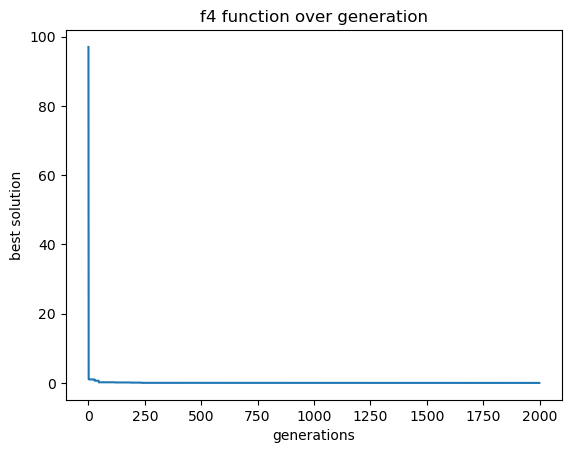

166.84414277314963

In [2]:
# GA(1000, 70, 'f4', 0.9, 0.95) #0.13
GA(2000, 70, 'f4', 0.9, 0.95) #0.02

In [165]:
# GA(1000, 50, 'f6', 0.02, 0.9) # 3.79
# GA(1000, 50, 'f6', 0.05, 0.9) # 1.46
# GA(1500, 50, 'f6', 0.07, 0.9) # 0.9
# GA(1500, 100, 'f6', 0.07, 0.9) # 0.4 - increasing itr to 2000 still gave 0.4

In [ ]:
GA(2000, 30, 'f6', 0.2, 0.95)

population: [30, 50, 70, 100, 200]
average cost: 0.22604627368284905


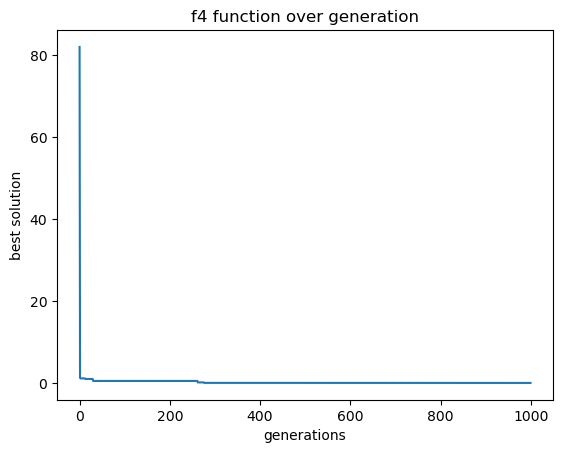



population: [30, 50, 70, 100, 200]
average cost: 0.2393699720270595


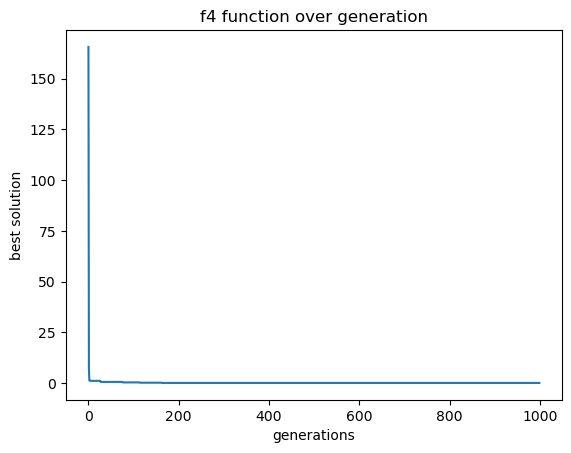



population: [30, 50, 70, 100, 200]
average cost: 0.2040574321722305


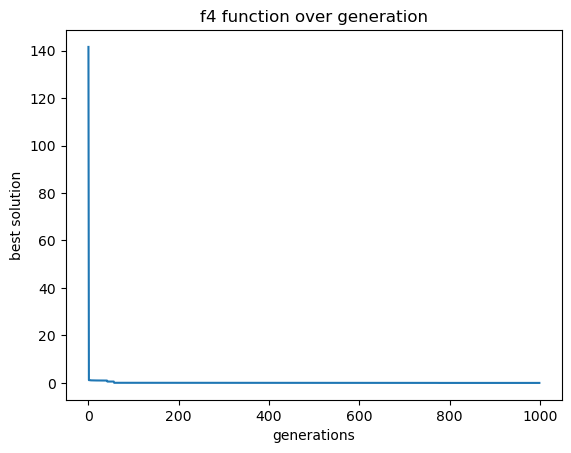



population: [30, 50, 70, 100, 200]
average cost: 0.14039757154982102


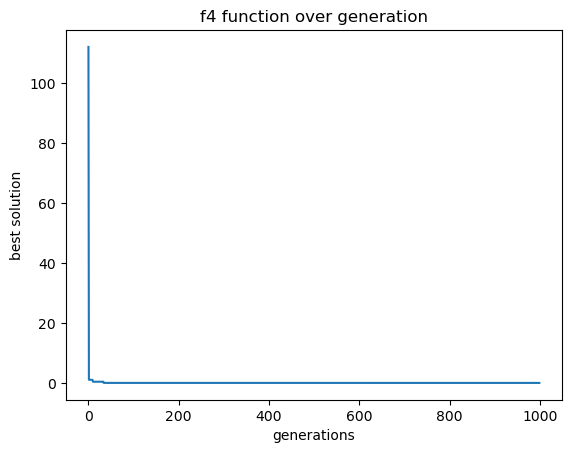



population: [30, 50, 70, 100, 200]


KeyboardInterrupt: 

In [132]:
pop = [30,50,70,100]
for p in pop:
    print("population:",p)
    best =  GA(1000, p, 'f4', 0.9, 0.95)
    print('\n')

In [190]:
avg = 0
n = 10
for i in range(n):
    best = GA (1000, 30, 'f4', 0.9, 0.95)
    avg += best_cost
print("Average best solution output:",avg/n)

KeyboardInterrupt: 